Instalación de librerias necesarias

In [2]:
!pip install litstudy



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 895.1 kB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.2/74.2 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 27.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 12.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 64.4 MB/s eta 0:00:00
  Created wheel for litstudy: filename=litstudy-1.0.6-py3-none-any.whl size=50021 sha256=2550976cc2e23af20dc724ee8cbdc15db76eba566d960c2dd55e37bab6df884a
  Stored in directory: /root/.cache/pip/wheels/72/97/1c/6327a

Importar las librerías necesarias y realizar las configuraciones pertinentes

In [19]:

# Import other libraries
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbs

# Options for plots
plt.rcParams['figure.figsize'] = (10, 6)
sbs.set('paper')

# Import litstudy
path = os.path.abspath(os.path.join('..'))
if path not in sys.path:
    sys.path.append(path)

import litstudy


Recolectar los datos de busqueda

In [20]:
docs_scopus = litstudy.load_scopus_csv('/data/scopus.csv')

print(len(docs_scopus), 'documentos encontrados')



100 documentos encontrados


Filtración segun el caso

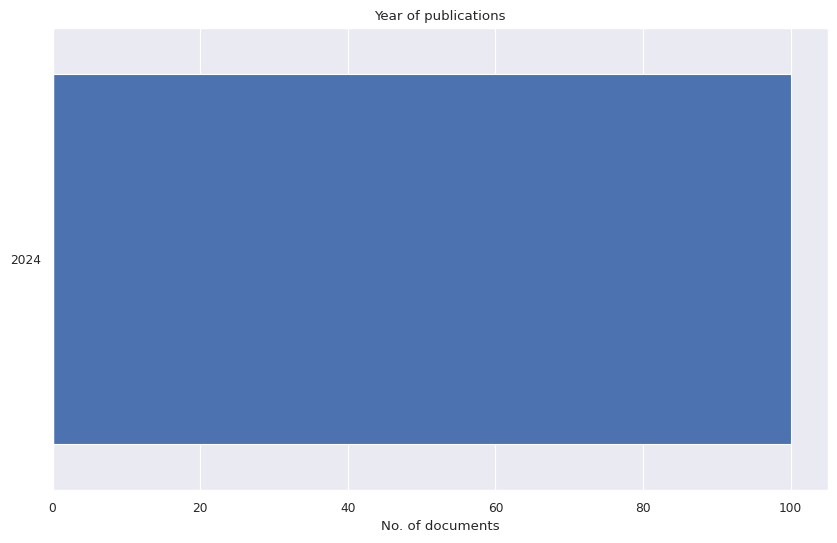

In [22]:
litstudy.plot_year_histogram(docs_scopus);


Estadisticas Generales

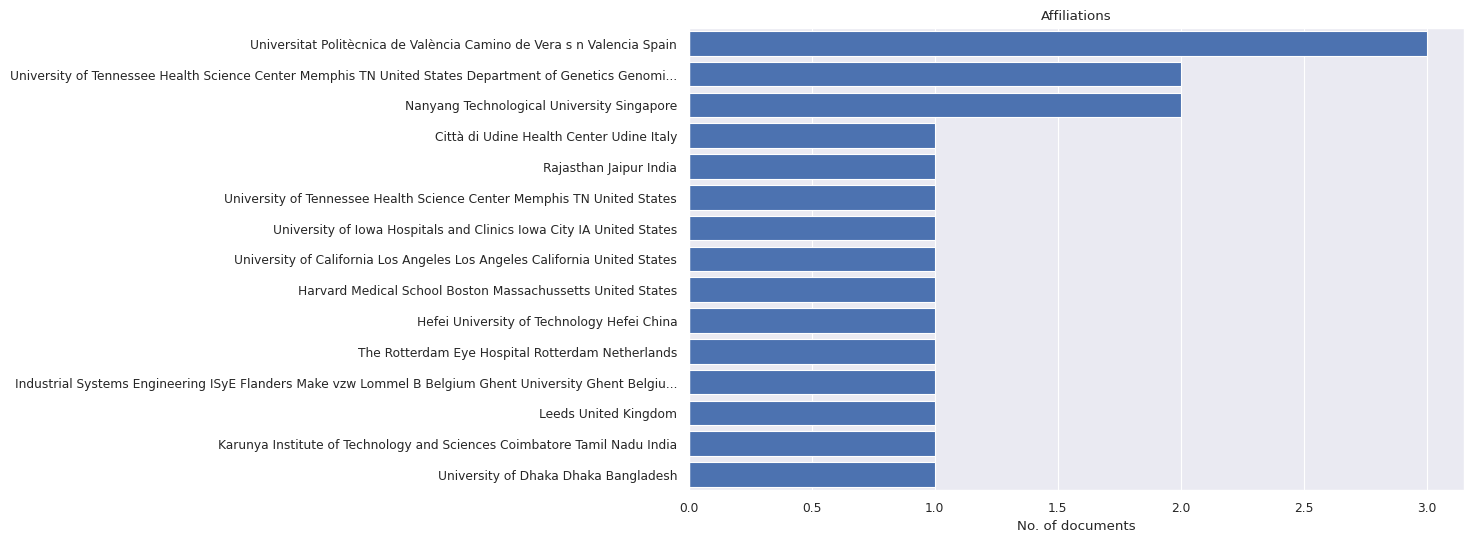

In [23]:

litstudy.plot_affiliation_histogram(docs_scopus, limit=15);


En la siguiente gráfica se presentan los autores que más han realizado publicaciones al respecto



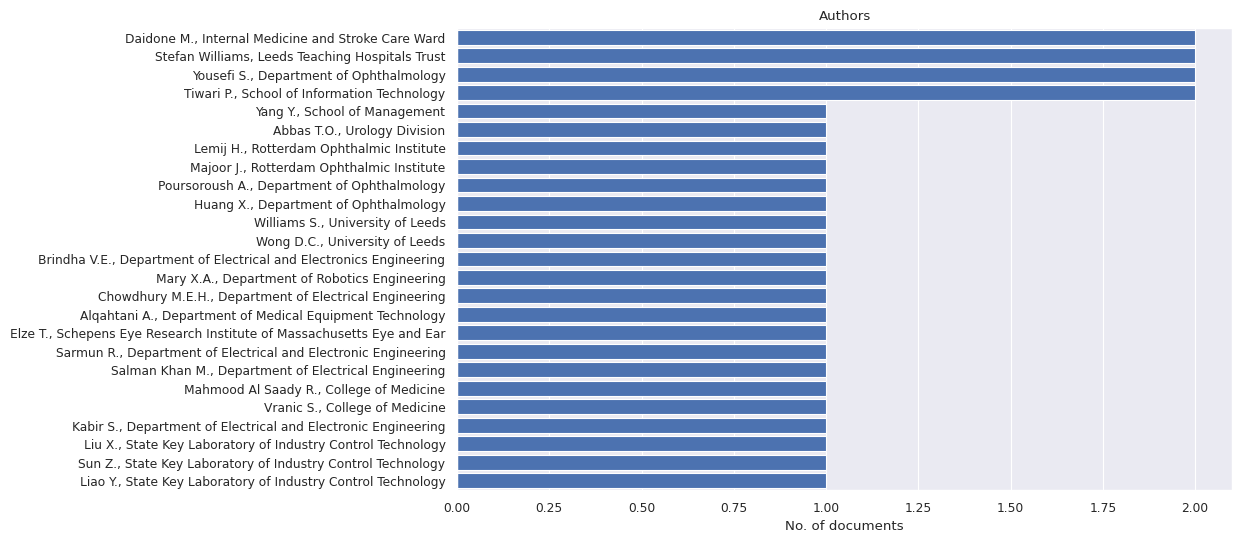

In [24]:
litstudy.plot_author_histogram(docs_scopus);


Continentes de origen acerca de **publicaciones**

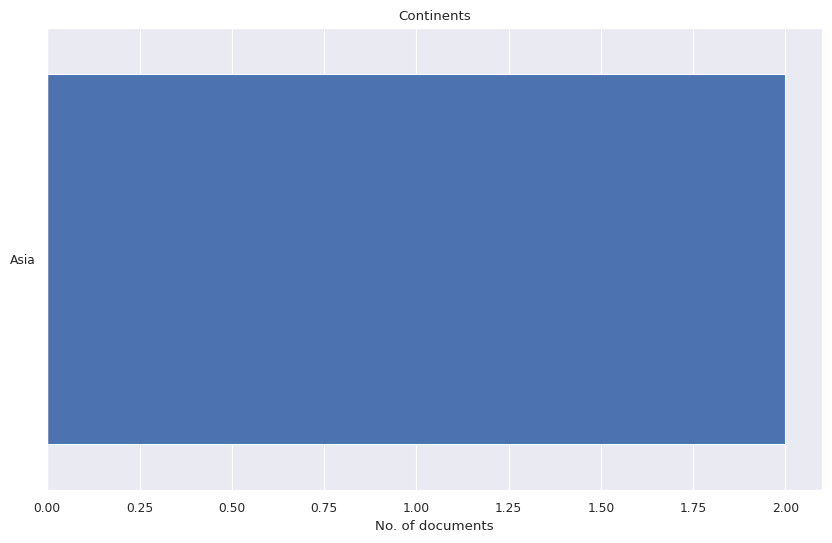

In [25]:
litstudy.plot_continent_histogram(docs_scopus);


Nubes de palabras relacionadas

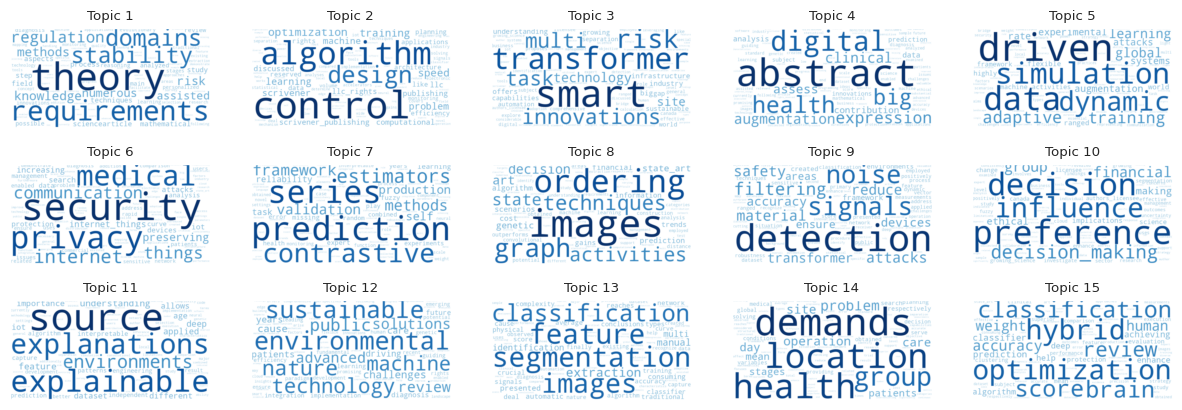

In [26]:
corpus = litstudy.build_corpus(docs_scopus, ngram_threshold=0.8)
num_topics = 15
topic_model = litstudy.train_nmf_model(corpus, num_topics, max_iter=250)
plt.figure(figsize=(15, 5))
litstudy.plot_topic_clouds(topic_model, ncols=5);